# EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("C:\\spotify")
from plot_functions import histogram_plot, boxplot_plot

In [2]:
df = pd.read_csv(r"C:/spotify/data_by_artist.csv")

In [3]:
df.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [4]:
df.tail()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
28675,1,2,0.512000,麥志誠,0.356000,198773.000000,0.3060,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.0,10
28676,0,2,0.541000,黃品源,0.578000,293840.000000,0.3340,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.0,9
28677,1,11,0.785455,黃國隆,0.570818,174582.727273,0.1484,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.0,5
28678,1,2,0.381000,黑豹,0.353000,316160.000000,0.6860,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.0,11
28679,1,2,0.568000,조정현,0.447000,237688.000000,0.2150,0.000001,0.064900,-16.478000,0.027200,71.979000,0.177000,31.0,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [6]:
df.isnull().sum()

mode                0
count               0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [7]:
df.columns

Index(['mode', 'count', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'key'],
      dtype='object')

In [8]:
df.describe()

,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.000000,28680.000000,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.759170,13.847211,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901
std,0.427595,53.372544,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552
min,0.000000,1.000000,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000
50%,1.000000,3.000000,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000
75%,1.000000,8.000000,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000
max,1.000000,3169.000000,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000


## FEATURE ANALYSIS

### 1. Mode

In [9]:
df['mode'].describe()

count    28680.000000
mean         0.759170
std          0.427595
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mode, dtype: float64

In [10]:
df['mode'].value_counts(ascending=False)

1    21773
0     6907
Name: mode, dtype: int64

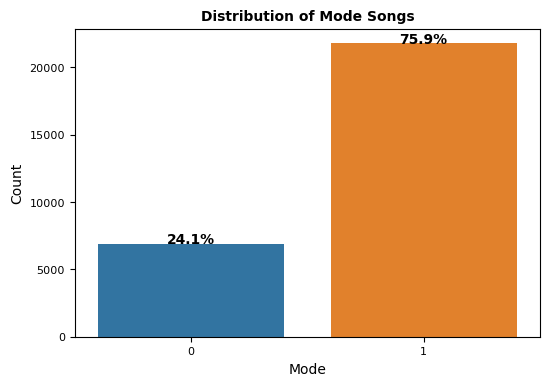

In [11]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='mode', data=df)
plt.title('Distribution of Mode Songs', fontsize=10, fontweight='bold')  
plt.xlabel('Mode', fontsize=10) 
plt.ylabel('Count', fontsize=10)  
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 

total = len(df['mode'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height / total * 100:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.show()

### 2. Count

In [12]:
df['count'].describe()

count    28680.000000
mean        13.847211
std         53.372544
min          1.000000
25%          2.000000
50%          3.000000
75%          8.000000
max       3169.000000
Name: count, dtype: float64

In [13]:
df['count'].value_counts(ascending=False)

2       10528
1        3439
4        3308
6        1626
8        1105
        ...  
330         1
249         1
259         1
294         1
2422        1
Name: count, Length: 379, dtype: int64

In [14]:
df['count'].nunique()

379

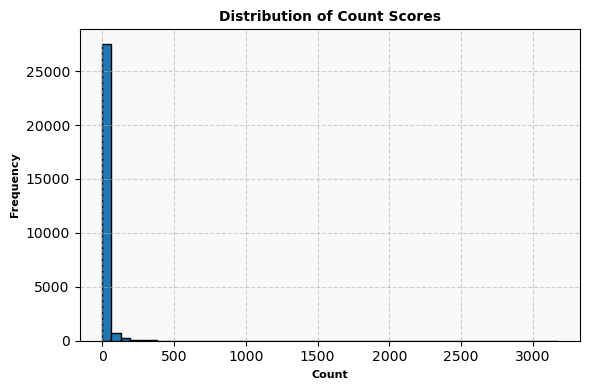

In [15]:
histogram_plot(df, 'count', 'Count', 'Distribution of Count Scores')

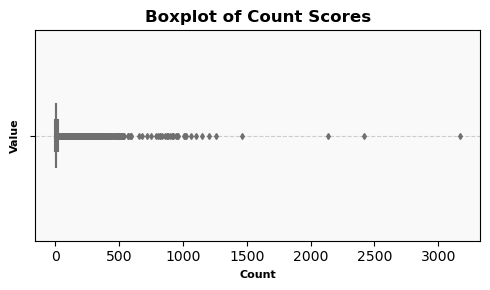

In [16]:
boxplot_plot(
    data=df,
    column_name='count',
    xlabel='Count',
    title='Boxplot of Count Scores'
)

### 3. Acousticness

In [17]:
df['acousticness'].describe()

count    28680.000000
mean         0.498373
std          0.370614
min          0.000000
25%          0.122296
50%          0.478458
75%          0.896000
max          0.996000
Name: acousticness, dtype: float64

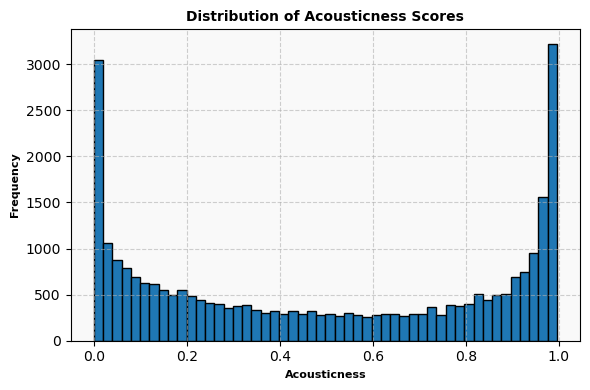

In [18]:
histogram_plot(df, 'acousticness', 'Acousticness', 'Distribution of Acousticness Scores')

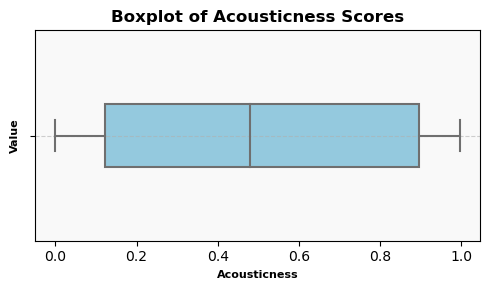

In [19]:
boxplot_plot(
    data=df,
    column_name='acousticness',
    xlabel='Acousticness',
    title='Boxplot of Acousticness Scores'
)

### 4.Artists

In [20]:
df['artists'].value_counts()

"Cats" 1981 Original London Cast    1
Pierre Dac                          1
Passafire                           1
Pase Rock                           1
Pascal Rogé                         1
                                   ..
Grant Llewellyn                     1
Grant Lee Buffalo                   1
Grant Gustin                        1
Grant Green                         1
조정현                                 1
Name: artists, Length: 28680, dtype: int64

In [21]:
df['artists'].nunique()

28680

In [22]:
artist_counts = df['artists'].value_counts()

top_10_artists = artist_counts.head(10)

print("Top 10 artists and their scores (based on the number of songs):")
for artist, count in top_10_artists.items():
    print(f"{artist}: {count}")

Top 10 artists and their scores (based on the number of songs):
"Cats" 1981 Original London Cast: 1
Pierre Dac: 1
Passafire: 1
Pase Rock: 1
Pascal Rogé: 1
Pascal Devoyon: 1
Pascal Bournet: 1
Parvez Kapadia: 1
Parvati Khan: 1
Parv0: 1


### 5. Danceability

In [23]:
df['danceability'].nunique()

10650

In [24]:
df['danceability'].describe()

count    28680.000000
mean         0.546490
std          0.176474
min          0.000000
25%          0.431000
50%          0.557000
75%          0.675000
max          0.986000
Name: danceability, dtype: float64

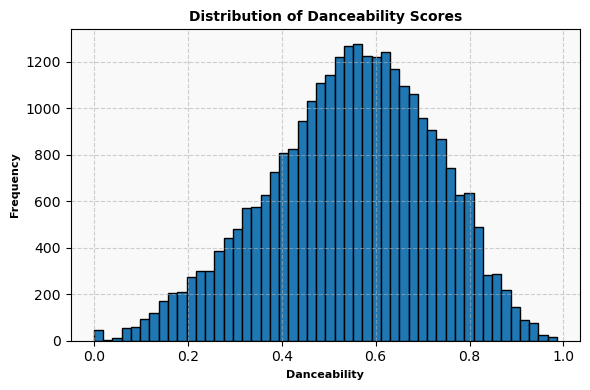

In [25]:
histogram_plot(df, 'danceability', 'Danceability', 'Distribution of Danceability Scores')

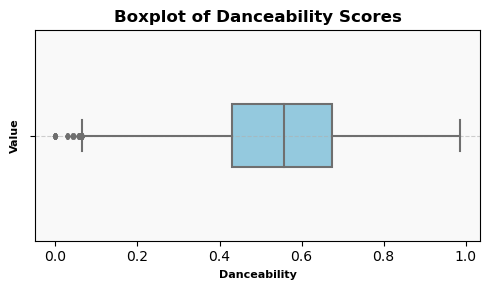

In [26]:
boxplot_plot(
    data=df,
    column_name='danceability',
    xlabel='Danceability',
    title='Boxplot of Danceability Scores'
)

In [27]:
num_zeros = (df['danceability'] == 0).sum()
print("Number of instances with danceability value 0:", num_zeros)

Number of instances with danceability value 0: 47


In [28]:
df = df[df['danceability'] > 0]

In [29]:
df['danceability'].value_counts().sum()

28633

### 6. Duration (ms)

In [30]:
df['duration_ms'].describe()

count    2.863300e+04
mean     2.388278e+05
std      1.171844e+05
min      1.879550e+04
25%      1.824530e+05
50%      2.186400e+05
75%      2.684670e+05
max      4.270034e+06
Name: duration_ms, dtype: float64

In [31]:
df['duration_min'] = df['duration_ms'] / 60000

In [32]:
df['duration_min'].describe()

count    28633.000000
mean         3.980463
std          1.953074
min          0.313258
25%          3.040883
50%          3.644000
75%          4.474450
max         71.167233
Name: duration_min, dtype: float64

In [33]:
df['duration_min'].value_counts(ascending=False)

3.644000    24
3.333333    15
3.231783    15
3.077489    15
3.565243    13
            ..
4.419067     1
6.775628     1
4.683783     1
4.180167     1
3.961467     1
Name: duration_min, Length: 23934, dtype: int64

In [34]:
zero_duration_count = (df['duration_min'] == 0).sum()
print("Number of rows with 0 duration:", zero_duration_count)

Number of rows with 0 duration: 0


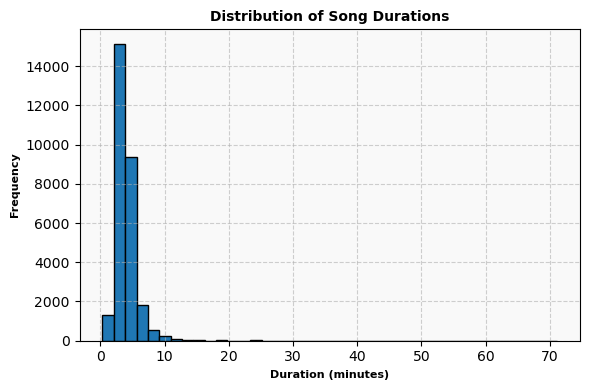

In [35]:
plt.figure(figsize=(6, 4))
plt.hist(df['duration_min'], bins=40, edgecolor='black')
plt.title('Distribution of Song Durations', fontsize=10, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=8, fontweight='bold')
plt.ylabel('Frequency', fontsize=8, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_facecolor('#f9f9f9')
plt.tight_layout()
plt.show()

In [36]:
duration_limit = 10
filtered_df = df[df['duration_min'] > duration_limit]
total_count = len(df)
filtered_count = len(filtered_df)
percentage_above_limit = (filtered_count / total_count) * 100

print(f"Percentage of songs with duration > {duration_limit} minutes: {percentage_above_limit:.2f}%")

Percentage of songs with duration > 10 minutes: 1.09%


In [37]:
duration_limit = 10

df = df[df['duration_min'] <= duration_limit]
df['duration_min'].describe()

count    28320.000000
mean         3.855552
std          1.326156
min          0.313258
25%          3.033017
50%          3.631147
75%          4.436329
max         10.000000
Name: duration_min, dtype: float64

### 7.Energy

In [38]:
df['energy'].describe()

count    28320.000000
mean         0.500513
std          0.253637
min          0.000240
25%          0.288000
50%          0.507850
75%          0.704774
max          1.000000
Name: energy, dtype: float64

In [39]:
df['energy'].nunique()

12015

In [40]:
df['energy'].value_counts(ascending=False)

0.700000    36
0.759000    35
0.477000    34
0.741000    34
0.635000    34
            ..
0.858000     1
0.257189     1
0.060900     1
0.013300     1
0.069240     1
Name: energy, Length: 12015, dtype: int64

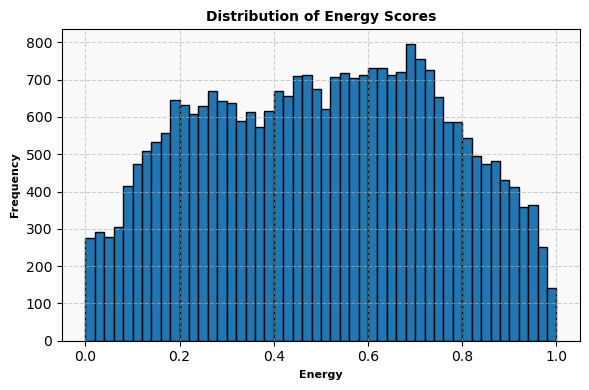

In [41]:
histogram_plot(df, 'energy', 'Energy', 'Distribution of Energy Scores')

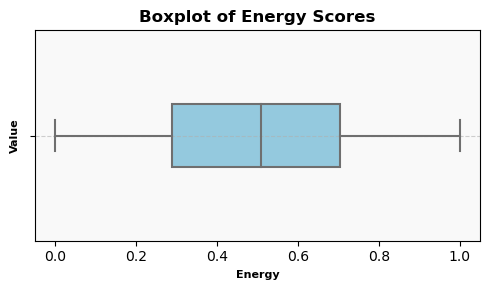

In [42]:
boxplot_plot(
    data=df,
    column_name='energy',
    xlabel='Energy',
    title='Boxplot of Energy Scores'
)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28320 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28320 non-null  int64  
 1   count             28320 non-null  int64  
 2   acousticness      28320 non-null  float64
 3   artists           28320 non-null  object 
 4   danceability      28320 non-null  float64
 5   duration_ms       28320 non-null  float64
 6   energy            28320 non-null  float64
 7   instrumentalness  28320 non-null  float64
 8   liveness          28320 non-null  float64
 9   loudness          28320 non-null  float64
 10  speechiness       28320 non-null  float64
 11  tempo             28320 non-null  float64
 12  valence           28320 non-null  float64
 13  popularity        28320 non-null  float64
 14  key               28320 non-null  int64  
 15  duration_min      28320 non-null  float64
dtypes: float64(12), int64(3), object(1)
memo

### 8. Instrumentalness

In [44]:
df['instrumentalness'].describe()

count    28320.000000
mean         0.171335
std          0.295600
min          0.000000
25%          0.000004
50%          0.001770
75%          0.204000
max          1.000000
Name: instrumentalness, dtype: float64

In [45]:
df['instrumentalness'].value_counts(ascending=False)

0.000000    5306
0.913000      31
0.911000      28
0.907000      27
0.904000      25
            ... 
0.156034       1
0.159097       1
0.000115       1
0.105842       1
0.000083       1
Name: instrumentalness, Length: 15414, dtype: int64

In [46]:
df['instrumentalness'].nunique()

15414

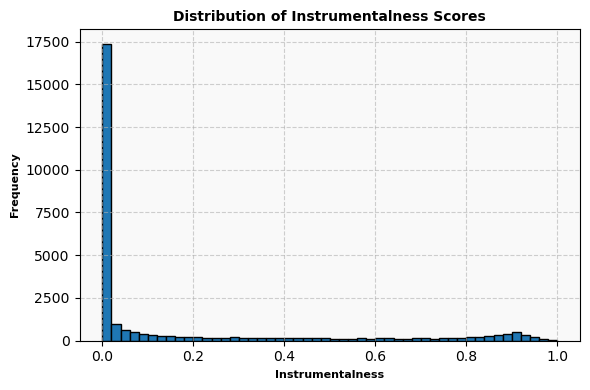

In [47]:
histogram_plot(df, 'instrumentalness', 'Instrumentalness', 'Distribution of Instrumentalness Scores')

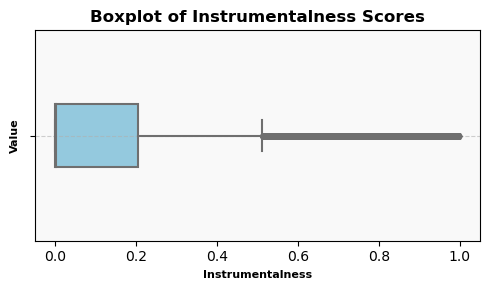

In [48]:
boxplot_plot(
    data=df,
    column_name='instrumentalness',
    xlabel='Instrumentalness',
    title='Boxplot of Instrumentalness Scores'
)

### 9. Liveness

In [49]:
df['liveness'].describe()

count    28320.000000
mean         0.202215
std          0.140179
min          0.011600
25%          0.110680
50%          0.161062
75%          0.247000
max          0.991000
Name: liveness, dtype: float64

In [50]:
df['liveness'].value_counts(ascending=False)

0.109000    156
0.111000    149
0.107000    145
0.108000    143
0.110000    139
           ... 
0.235080      1
0.078567      1
0.425143      1
0.109050      1
0.142191      1
Name: liveness, Length: 12091, dtype: int64

In [51]:
df['liveness'].nunique()

12091

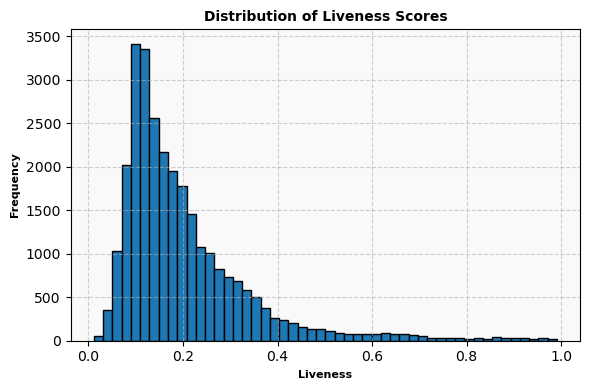

In [52]:
histogram_plot(df, 'liveness', 'Liveness', 'Distribution of Liveness Scores')

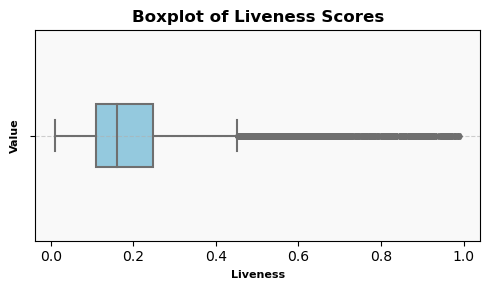

In [53]:
boxplot_plot(
    data=df,
    column_name='liveness',
    xlabel='Liveness',
    title='Boxplot of Liveness Scores'
)

### 10.Loudness         

In [54]:
df['loudness'].describe()

count    28320.000000
mean       -11.046467
std          5.685297
min        -54.837000
25%        -13.838188
50%        -10.002000
75%         -6.859889
max          1.342000
Name: loudness, dtype: float64

In [55]:
df['loudness'].value_counts(ascending=False)

-10.978500    22
-12.357000    17
-12.858000    16
-17.901143    13
-15.097500    12
              ..
-7.425000      1
-6.351500      1
-8.429000      1
-12.989000     1
-16.478000     1
Name: loudness, Length: 21649, dtype: int64

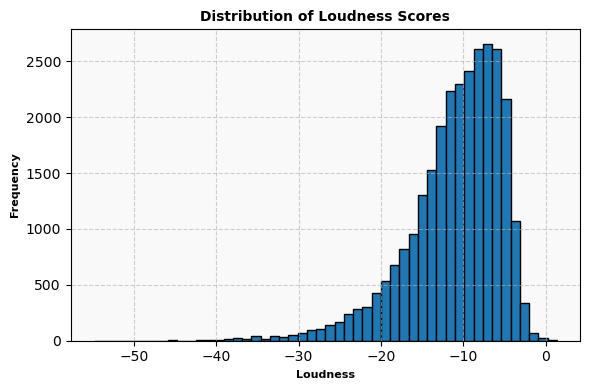

In [56]:
histogram_plot(df, 'loudness', 'Loudness', 'Distribution of Loudness Scores')

### 12. Tempo

In [57]:
df['tempo'].describe()

count    28320.000000
mean       116.192698
std         24.544731
min         14.638400
25%         99.678636
50%        115.586971
75%        129.951409
max        217.743000
Name: tempo, dtype: float64

In [58]:
df['tempo'].value_counts(ascending=False)

125.391250    22
124.098333    15
78.534000     14
100.143900    13
99.996000     12
              ..
139.234667     1
83.940667      1
168.269000     1
114.916000     1
71.979000      1
Name: tempo, Length: 24580, dtype: int64

In [59]:
df['tempo'].nunique()

24580

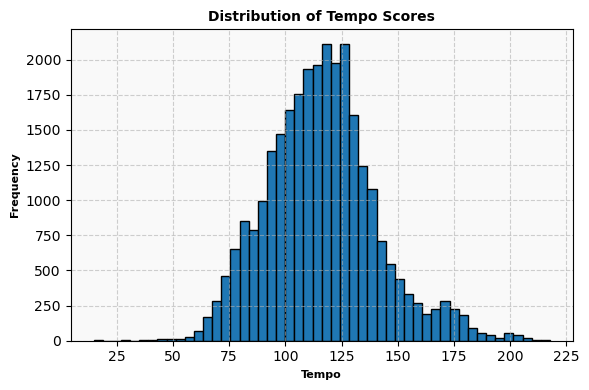

In [60]:
histogram_plot(df, 'tempo', 'Tempo', 'Distribution of Tempo Scores')

### 13. Valence

In [61]:
df['valence'].nunique()

11786

In [62]:
df['valence'].describe()

count    28320.000000
mean         0.516590
std          0.242111
min          0.000005
25%          0.335000
50%          0.526211
75%          0.704518
max          0.991000
Name: valence, dtype: float64

In [63]:
df['valence']

0        0.389500
1        0.268865
2        0.354857
3        0.372030
4        0.482286
           ...   
28675    0.328000
28676    0.243000
28677    0.741273
28678    0.352000
28679    0.177000
Name: valence, Length: 28320, dtype: float64

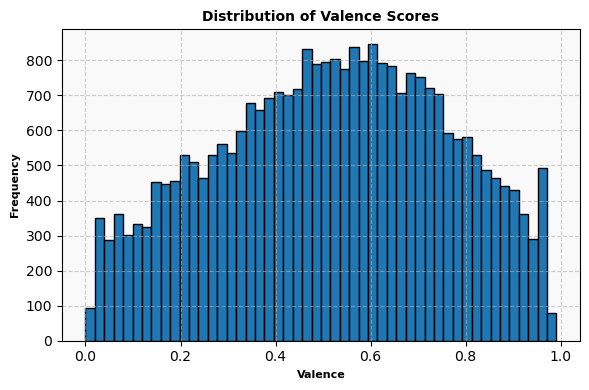

In [64]:
histogram_plot(df, 'valence', 'Valence', 'Distribution of Valence Scores')

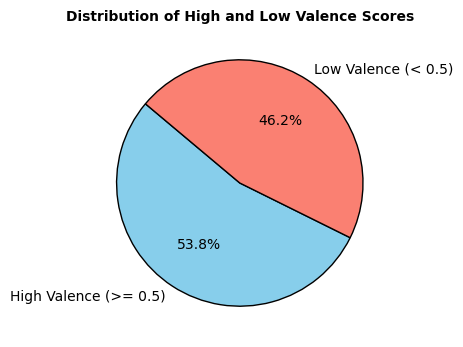

In [65]:
valence_data = df['valence']

high_count = valence_data[valence_data >= 0.5].count()
low_count = valence_data[valence_data < 0.5].count()
total_count = high_count + low_count

high_percentage = (high_count / total_count) * 100
low_percentage = (low_count / total_count) * 100

labels = ['High Valence (>= 0.5)', 'Low Valence (< 0.5)']
sizes = [high_percentage, low_percentage]
colors = ['skyblue', 'salmon']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of High and Low Valence Scores', fontsize=10, fontweight='bold')

plt.show()

### 14. Popularity

In [66]:
df['popularity'].describe()

count    28320.000000
mean        34.158174
std         22.339018
min          0.000000
25%         12.000000
50%         39.000000
75%         51.076923
max         93.000000
Name: popularity, dtype: float64

In [67]:
df['popularity'].value_counts(ascending=False)

0.000000     4273
43.000000     373
39.000000     361
49.000000     357
42.000000     354
             ... 
34.235294       1
2.297297        1
6.400000        1
56.272727       1
3.523810        1
Name: popularity, Length: 4654, dtype: int64

In [68]:
df['popularity'].nunique()

4654

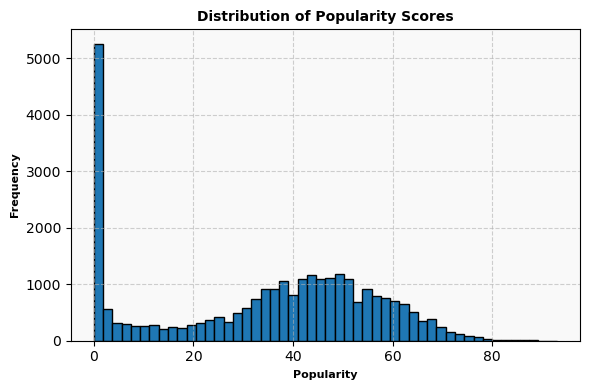

In [69]:
histogram_plot(df, 'popularity', 'Popularity', 'Distribution of Popularity Scores')

### 15. Key

In [70]:
df['key'].describe()

count    28320.000000
mean         5.417726
std          3.479685
min          0.000000
25%          2.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: key, dtype: float64

In [71]:
df['key'].value_counts(ascending=False)

7     4208
2     2981
0     2909
5     2743
9     2594
1     2286
11    2188
10    2106
4     1839
6     1756
8     1503
3     1207
Name: key, dtype: int64

In [72]:
df['key'].nunique()

12

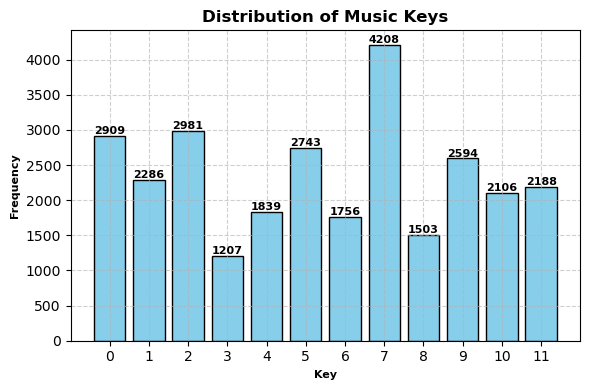

In [73]:
key_counts = df['key'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
bars = plt.bar(key_counts.index, key_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Key', fontsize=8, fontweight='bold')
plt.ylabel('Frequency', fontsize=8, fontweight='bold')
plt.title('Distribution of Music Keys', fontsize=12, fontweight='bold')
plt.xticks(key_counts.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.show()

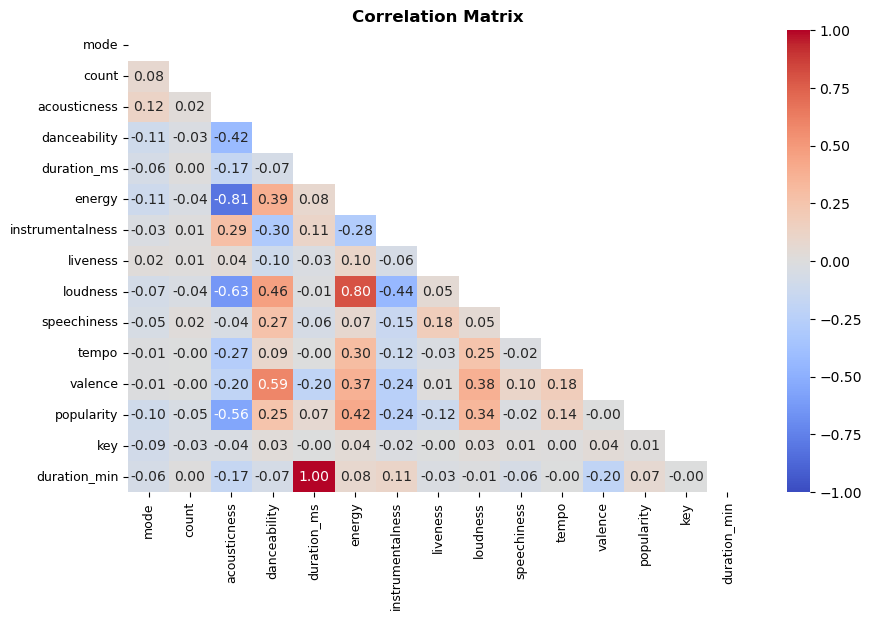

In [74]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Correlation Matrix', fontsize=12, fontweight='bold')
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28320 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28320 non-null  int64  
 1   count             28320 non-null  int64  
 2   acousticness      28320 non-null  float64
 3   artists           28320 non-null  object 
 4   danceability      28320 non-null  float64
 5   duration_ms       28320 non-null  float64
 6   energy            28320 non-null  float64
 7   instrumentalness  28320 non-null  float64
 8   liveness          28320 non-null  float64
 9   loudness          28320 non-null  float64
 10  speechiness       28320 non-null  float64
 11  tempo             28320 non-null  float64
 12  valence           28320 non-null  float64
 13  popularity        28320 non-null  float64
 14  key               28320 non-null  int64  
 15  duration_min      28320 non-null  float64
dtypes: float64(12), int64(3), object(1)
memo

In [76]:
df.to_csv("C:/spotify/artist_df.csv", index=False)